## Lawn Mower: Implementing SARSA

In [ ]:
# import cv2
import gym as gym
from gym import spaces
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import optuna


STEP 1

Apply SARSA algorithm to solve the environment that was defined in Part I.

In [ ]:
env = MyLawn()

epsilon = 1.0  # Initial exploration rate
epsilon_min = 0.01  # Minimum exploration rate
gamma = 0.95  # Discount factor
alpha = 0.15  # Learning rate
decay_rate = 0.995  # Epsilon decay rate per episode
total_episodes = 1000 
max_timestamp = 10
qt = np.zeros((env.obs_space.n, env.action_space.n))

rewards_epi = []
epsilon_values = []
steps_per_episode = []
penalties_per_episode = []

final_state = None
for episode in range(total_episodes):
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)
    total_rewards = 0
    total_steps = 0  
    action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(qt[state_index])

    while True:
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_steps += 1 
        next_strt_idx = env.obs_space_to_index(next_state)
        next_action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(qt[next_strt_idx])
        qt[state_index, action] = qt[state_index, action] + alpha * (reward + gamma * qt[next_strt_idx, next_action] - qt[state_index, action])
        state_index, action = next_strt_idx, next_action
        total_rewards += reward
        
        if terminated or truncated:
            break
    
    penalties_per_episode.append(env.get_penalty_count())  
    
    # Q-table for every 100 episodes
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}")
        print("Q-table:")
        print(qt)

        # average penalties
        avg_penalty = np.mean(penalties_per_episode[-100:])
        print(f"Average Penalties in Last 100 Episodes: {avg_penalty}")

    epsilon = max(epsilon_min, epsilon * decay_rate)
    epsilon_values.append(epsilon)
    rewards_epi.append(total_rewards)
    steps_per_episode.append(total_steps)

    if (episode + 1) % 100 == 0:
        average_steps = np.mean(steps_per_episode[-100:])
        print(f"Episode: {episode + 1}, Average Steps: {average_steps}")

    if episode == total_episodes - 1:
        final_state = env.state


Episode: 100
Q-table:
[[ 4.93610775  5.7433813   7.1169135   4.56796143]
 [ 2.12268834  1.86044874  4.49865054  3.77722851]
 [ 2.45536019  2.84398228 10.04658263  0.48550627]
 [ 0.          0.          0.          0.        ]
 [-2.94831436  1.66059313  1.49427373  0.03393916]
 [ 0.36227675  0.8690748   3.61337782 -1.86469012]
 [ 6.25550189  0.47296688  5.23499391 -0.44099293]
 [ 8.17733865  7.53622119  1.43325673  0.21652234]
 [ 0.          0.          0.          0.        ]
 [-3.84059823 -0.48094438  3.31713224 -3.33096888]
 [ 1.06637162  0.10149811  9.91155339 -1.87788374]
 [ 0.          0.          0.          0.        ]
 [-0.28729344 -1.24457071 -2.60546119 -0.12938344]
 [ 0.          0.          0.          0.        ]
 [ 0.89507659  0.          5.36713997 -0.72068904]
 [ 0.          0.          0.          0.        ]]
Average Penalties in Last 100 Episodes: 0.57
Episode: 100, Average Steps: 9.9
Episode: 200
Q-table:
[[13.23228914 18.3551931  22.81031337 16.49473661]
 [ 3.08741

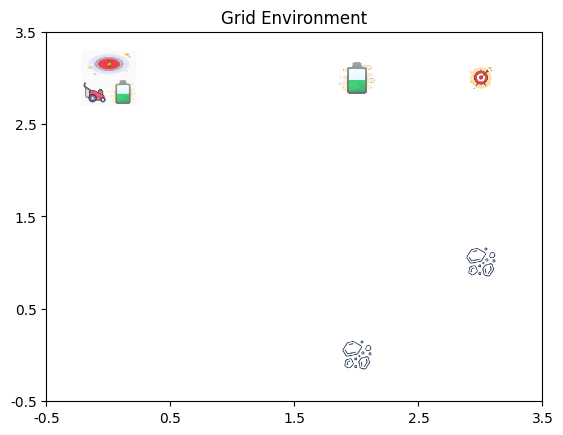

In [ ]:
env.state = final_state
env.render()

STEP 2

Provide the evaluation results:
- a.Print the initial Q-table and the trained Q-table
- b.Plot the total reward per episode graph (x-axis: episode, y-axis: total reward per episode).
- c.Plot the epsilon decay graph (x-axis: episode, y-axis: epsilon value)
- d. Run your environment for at least 10 episodes, where the agent chooses only greedy actions from the learned policy. Include a plot of the total reward per episode.

In [ ]:
initial_qt = np.zeros((env.obs_space.n, env.action_space.n))
print("Initial Q-table:")
print(initial_qt)

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
print("\nTrained Q-table:")
print(qt)


Trained Q-table:
[[61.39299061 72.76261212 80.50672387 71.68720928]
 [16.08348116 43.51112268 77.00857525 53.23554818]
 [26.12344347 49.89733659 79.28257239 51.64367697]
 [ 0.          0.          0.          0.        ]
 [11.66626883 32.27483795  3.80947107  8.09847011]
 [ 1.42355716  3.04137154 29.31628627  2.03774961]
 [48.16663376 19.2623858   8.6250471   0.90603438]
 [73.12553378 29.42552841 12.28056862  8.97288451]
 [ 0.          0.          0.          0.        ]
 [-1.30035954  0.12822357 13.50886571  1.31145966]
 [ 4.63927714  4.97761263 63.11576646  2.04150515]
 [ 0.          0.          0.          0.        ]
 [-0.28729344  4.44255388 -1.88429911 -0.12938344]
 [ 0.          0.          0.          0.        ]
 [ 0.89507659  0.         14.69809261 -0.72068904]
 [ 0.          0.          0.          0.        ]]


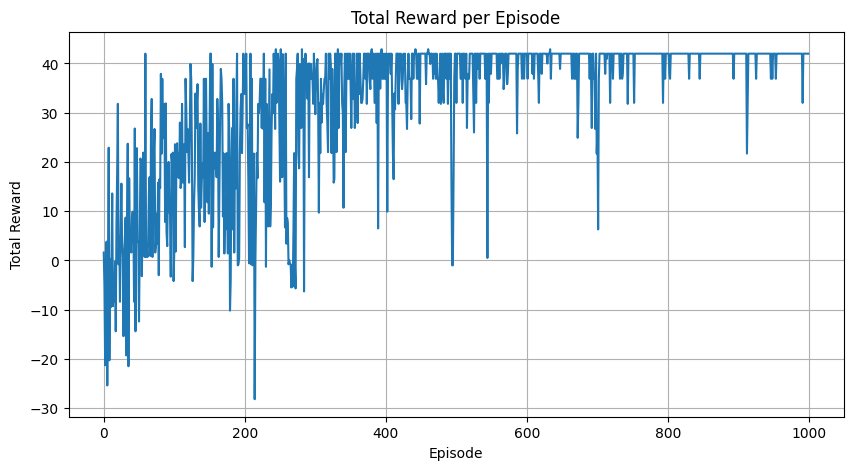

In [ ]:
# total reward per episode graph
plt.figure(figsize=(10, 5))
plt.plot(rewards_epi)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.grid(True)
plt.show()


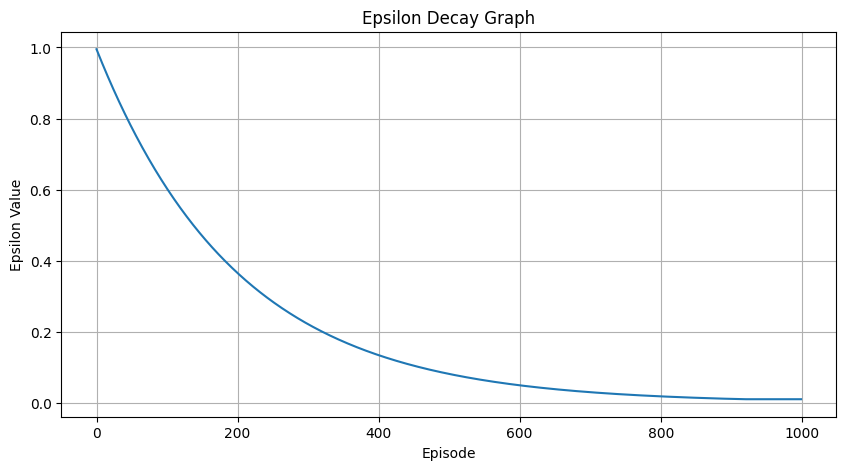

In [ ]:
# epsilon decay graph
plt.figure(figsize=(10, 5))
plt.plot(epsilon_values)
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay Graph')
plt.grid(True)
plt.show()

Episode 1000 Reward: 42
Episode 1000 Reward: 42
Episode 1000 Reward: 42
Episode 1000 Reward: 42
Episode 1000 Reward: 42
Episode 1000 Reward: 42
Episode 1000 Reward: 42
Episode 1000 Reward: 42
Episode 1000 Reward: 42
Episode 1000 Reward: 42


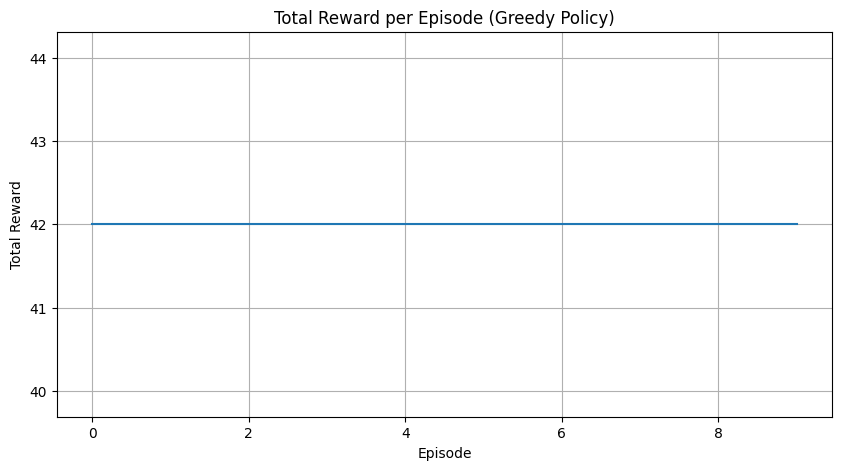

In [ ]:
greedy_rewards = []
for _ in range(10):
    total_reward = 0
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)

    while True:
        action = np.argmax(qt[state_index])
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_strt_idx = env.obs_space_to_index(next_state)
        total_reward += reward
        state_index = next_strt_idx
        if terminated or truncated:
            print(f"Episode {episode + 1} Reward: {round(total_reward, 4)}")
            break

    greedy_rewards.append(total_reward)

# total rewards for 10 episodes
plt.figure(figsize=(10, 5))
plt.plot(greedy_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode (Greedy Policy)')
plt.grid(True)
plt.show()

STEP 3
Hyperparameter tuning. Select at least two hyperparameters to tune to get better results for SARSA. You can explore hyperparameter tuning libraries, e.g. Optuna or make it manually. Parameters to tune (select 2):

- Discount factor (γ)
- Epsilon decay rate
- Epsilon min/max values
- Number of episodes
- Max timesteps

Try at least 3 different values for each of the parameters that you choose.

In [ ]:
performance_dict = {}

def training_loop(env, g , max_timestamp):
    alpha = 0.15  # Learning rate
    gamma = g  # Discount factor
    epsilon = 1.0  # Initial exploration rate
    epsilon_min = 0.01  # Minimum exploration rate
    decay_rate = 0.995  # Epsilon decay rate per episode
    total_episodes = 1000
    max_timestamp = max_timestamp

    qt = np.zeros((env.obs_space.n, env.action_space.n))

    rewards_epi = []
    epsilon_values = []
    steps_per_episode = []
    penalties_per_episode = []

    final_state = None
    for episode in range(total_episodes):
        state, _ = env.reset()
        state_index = env.obs_space_to_index(state)
        total_rewards = 0
        total_steps = 0 
        action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(qt[state_index])

        while True:
            next_state, reward, terminated, truncated, _ = env.step(action)
            total_steps += 1 
            next_strt_idx = env.obs_space_to_index(next_state)
            next_action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(qt[next_strt_idx])
            qt[state_index, action] = qt[state_index, action] + alpha * (reward + gamma * qt[next_strt_idx, next_action] - qt[state_index, action])
            state_index, action = next_strt_idx, next_action
            total_rewards += reward
            
            if terminated or truncated:
                break
        
        penalties_per_episode.append(env.get_penalty_count())  
        epsilon = max(epsilon_min, epsilon * decay_rate)
        epsilon_values.append(epsilon)
        rewards_epi.append(total_rewards)
        steps_per_episode.append(total_steps)

        if episode == total_episodes - 1:
            final_state = env.state
        
    final_reward = np.mean(rewards_epi[-100:]) 
    performance_dict[(alpha, gamma, max_timestamp)] = final_reward
    return qt, rewards_epi, epsilon_values, final_state
        


In [ ]:
def evaluate_loop(env, max_timestamp, gamma, qt, rewards_epi, epsilon_values, final_state):
    print(f"Max Timestamp, Gamma:  {max_timestamp}, {gamma}")

    initial_qt = np.zeros((env.obs_space.n, env.action_space.n))
    print("Initial Q-table:")
    print(initial_qt)
    print("\nTrained Q-table:")
    print(qt)


    plt.figure(figsize=(10, 5))
    plt.plot(rewards_epi)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(epsilon_values)
    plt.xlabel('Episode')
    plt.ylabel('Epsilon Value')
    plt.title('Epsilon Decay Graph')
    plt.grid(True)
    plt.show()

    greedy_rewards = []
    for _ in range(10):
        total_reward = 0
        state, _ = env.reset()
        state_index = env.obs_space_to_index(state)

        while True:
            action = np.argmax(qt[state_index])
            next_state, reward, terminated, truncated, _ = env.step(action)
            next_strt_idx = env.obs_space_to_index(next_state)
            total_reward += reward
            state_index = next_strt_idx

            if terminated or truncated:
                print(f"Episode {episode + 1} Reward: {round(total_reward, 4)}")
                break

        greedy_rewards.append(total_reward)

    plt.figure(figsize=(10, 5))
    plt.plot(greedy_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode (Greedy Policy)')
    plt.grid(True)
    plt.show()

    env.state = final_state
    env.render()   

Max Timestamp, Gamma:  12, 0.1
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 1.46970311  3.41440313  5.32299072  0.4405691 ]
 [ 1.11133941  0.03625522  1.54657224 -0.57166931]
 [ 1.13766417  0.41856681  5.4678709  -0.86114001]
 [ 0.          0.          0.          0.        ]
 [-4.64129384 -0.72393866  1.10188127 -0.07464739]
 [ 0.94367762 -0.92974816  1.16027634 -0.94522349]
 [ 1.37074243 -0.65923108  1.642411   -0.92284503]
 [ 6.48478471  5.39821022  0.46052814 -0.87588221]
 [ 0.          0.          0.          0.        ]
 [-4.52491867 -0.73932166  1.47953695 -4.36248202]
 [ 1.58159437 -0.68122192  6.4806719  -0.85483117]
 [ 0.          0.          0.          0.        ]
 [-0.14717881 -2.28495063 -4.25782436 -0.15180451]
 [ 0.          0.          0. 

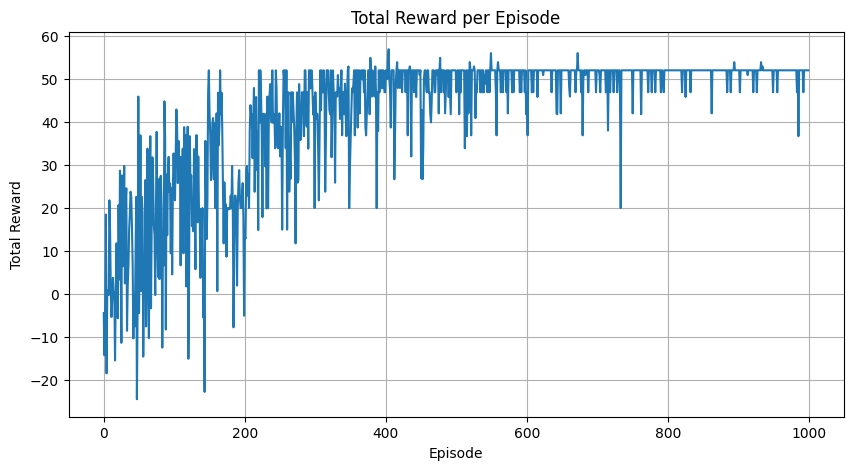

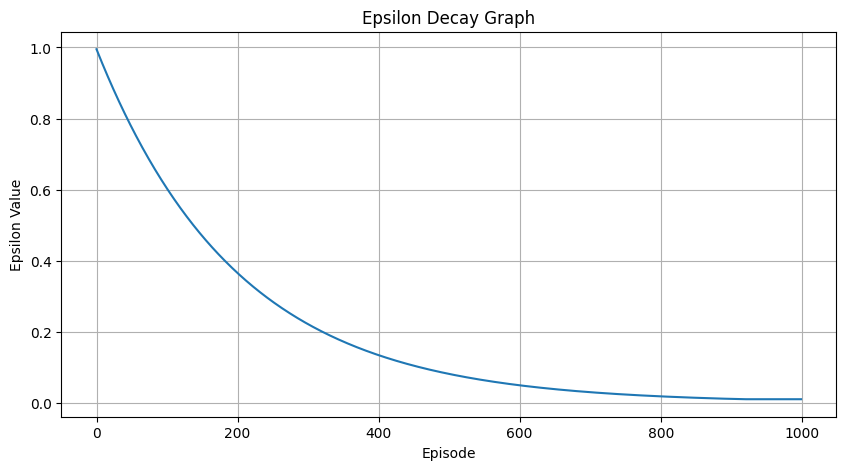

Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52


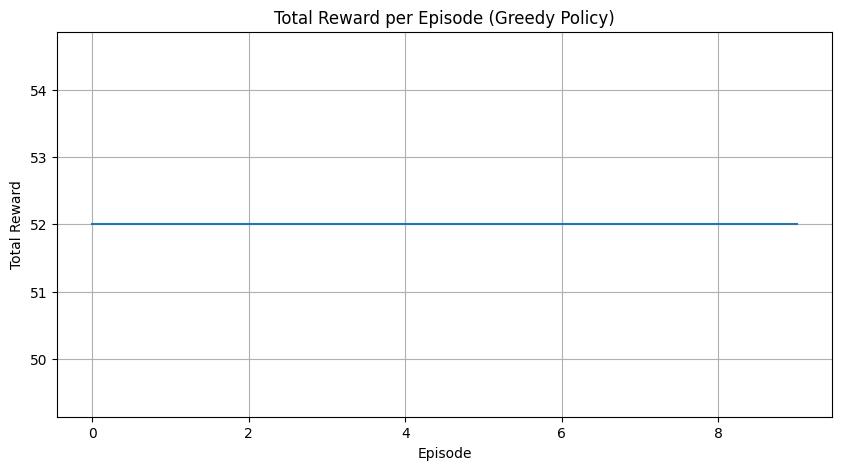

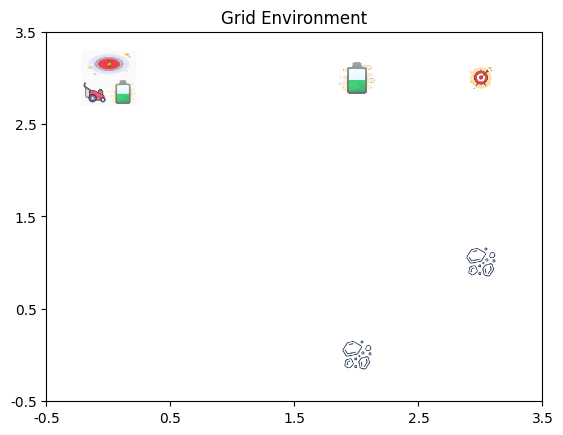

Max Timestamp, Gamma:  12, 0.5
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 4.61725148  7.08450735  9.15103102  4.473967  ]
 [ 2.59008579  2.15723878  5.54128323  2.70413   ]
 [ 3.58942173  3.91348905  9.03929872  1.18799774]
 [ 0.          0.          0.          0.        ]
 [-2.91568935  1.89719398  2.59369217  0.2537576 ]
 [ 2.01322896  0.77907859  3.63389535 -0.98695131]
 [ 4.65975337  1.59361708  5.92828861 -0.22514045]
 [10.22553723  7.89707175  3.72449392  1.2584203 ]
 [ 0.          0.          0.          0.        ]
 [-2.45139486 -0.51677694  3.86059183 -2.05907993]
 [ 3.50364645  0.38252523  9.66127928  0.5260365 ]
 [ 0.          0.          0.          0.        ]
 [-0.50411383 -2.10640842 -3.46003095 -0.62823561]
 [ 0.          0.          0. 

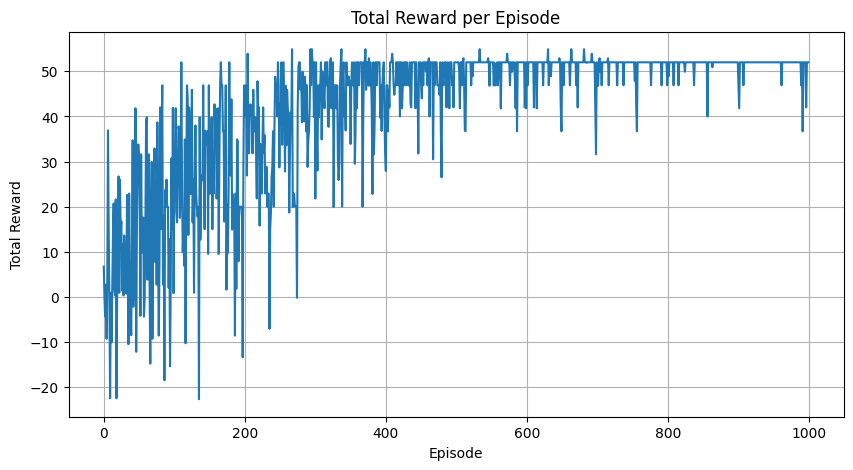

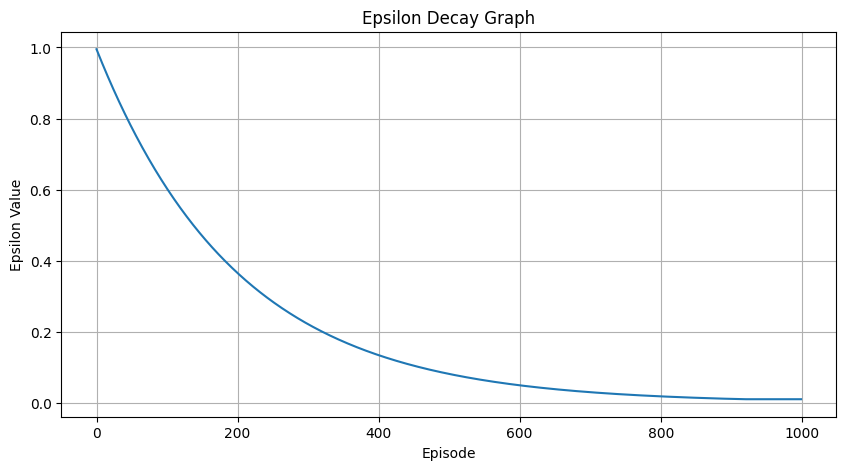

Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52


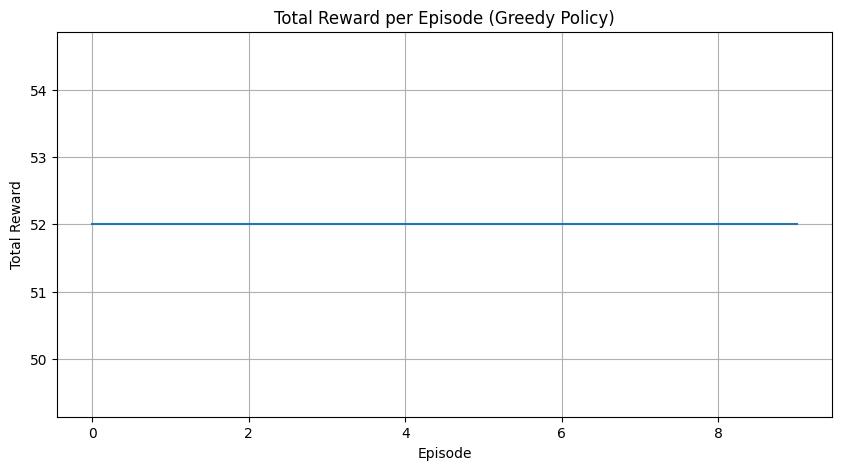

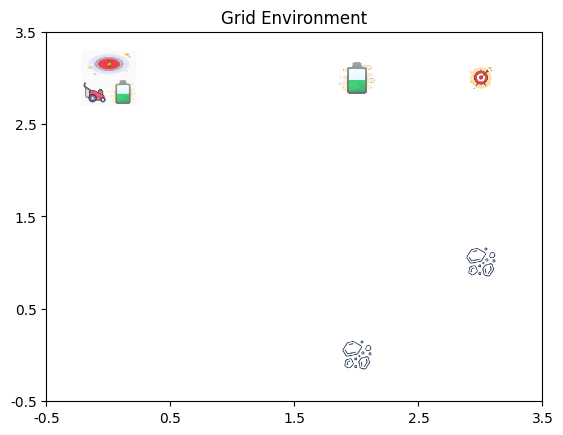

Max Timestamp, Gamma:  12, 0.9
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[36.37137631 40.62616894 42.84290847 37.63009399]
 [13.51990023 27.31724338 39.10379477 28.77798754]
 [21.42170126 28.92050144 42.38047933 25.8820195 ]
 [ 0.          0.          0.          0.        ]
 [ 2.78492105 29.19058035 10.9570313   3.29409681]
 [ 3.51261853  1.88664111 21.81663716  5.74846083]
 [ 4.93505003 17.10509433 30.57084824  6.00249408]
 [28.61756228 41.82683614 13.27949014 13.95625166]
 [ 0.          0.          0.          0.        ]
 [-3.19584955 -0.07401816  8.94806742  2.56293764]
 [ 0.61451853  4.23792876 18.12952044 -0.43065219]
 [ 0.          0.          0.          0.        ]
 [-0.51970308 -1.16001884 -3.45247113 -0.59830383]
 [ 0.          0.          0. 

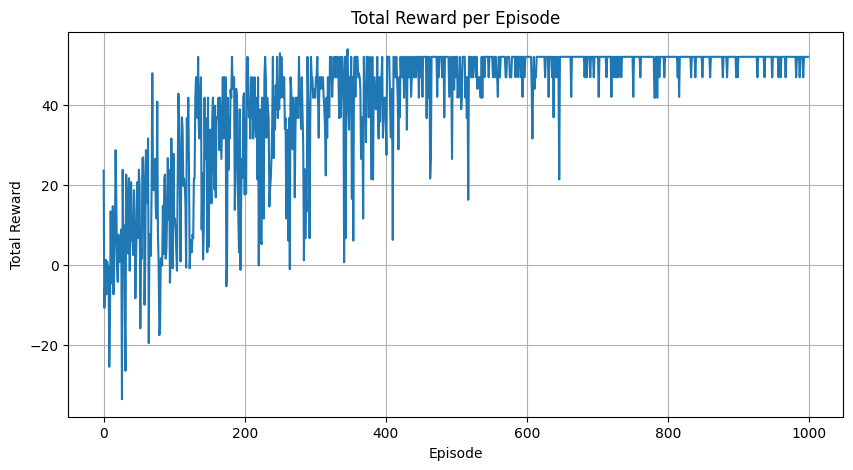

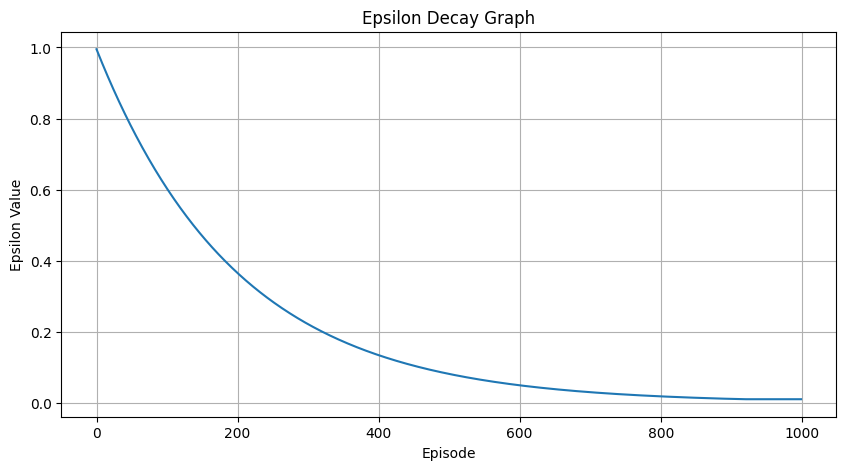

Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52
Episode 1000 Reward: 52


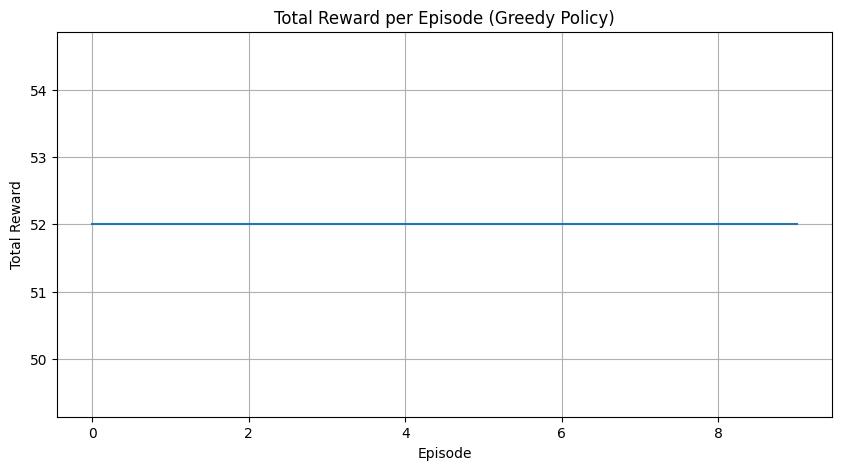

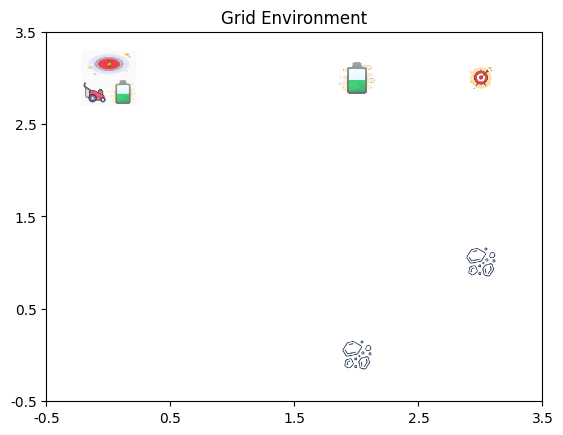

Max Timestamp, Gamma:  15, 0.1
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 0.63387401  4.49217394  5.4194239   0.41588098]
 [ 1.09546548  0.03841747  1.5477699  -0.53358024]
 [ 1.13614283  0.38508015  5.47776281 -0.85850588]
 [ 0.          0.          0.          0.        ]
 [-4.66312364 -0.60161786  1.10611435 -0.08676839]
 [ 1.03731713 -0.86790714  1.14186436 -0.92941304]
 [ 1.45985031 -0.56884793  1.63914372 -0.9167606 ]
 [ 6.49988813  5.46777676  0.38329163 -0.8988462 ]
 [ 0.          0.          0.          0.        ]
 [-4.67021927 -0.82936068  1.36091674 -3.51612525]
 [ 1.47767054 -0.8515677   6.53779095 -0.8787274 ]
 [ 0.          0.          0.          0.        ]
 [-0.12683633 -2.74976258 -4.42604638 -0.20293501]
 [ 0.          0.          0. 

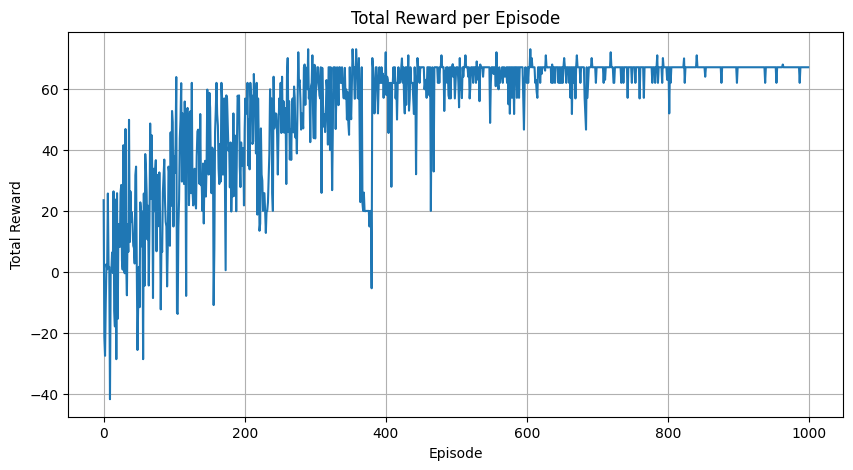

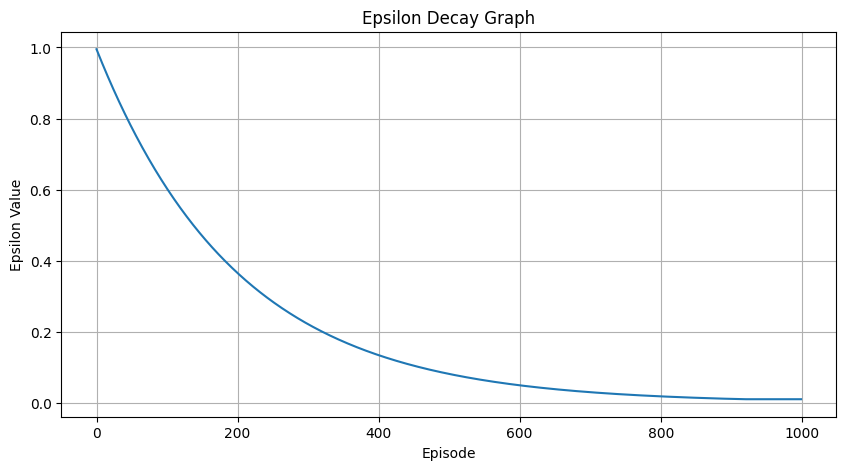

Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67


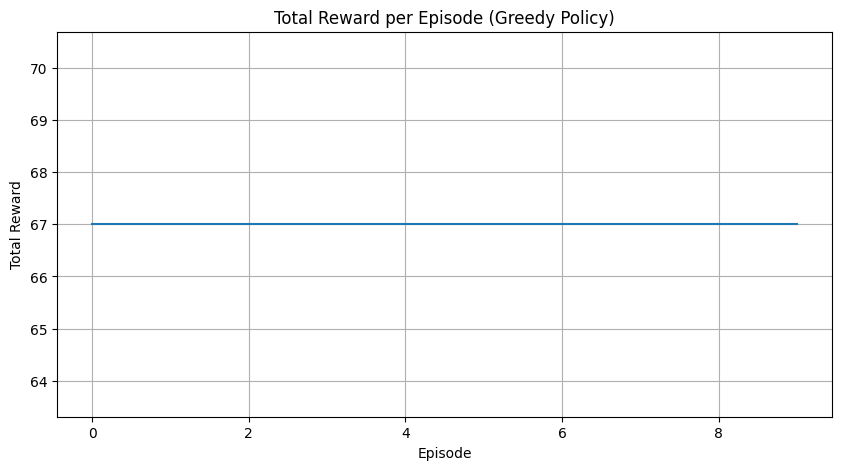

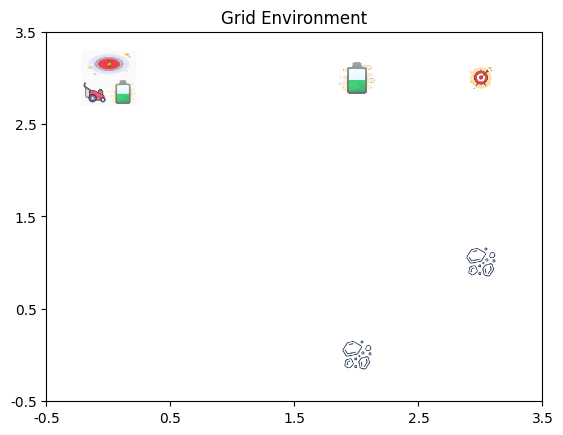

Max Timestamp, Gamma:  15, 0.5
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 6.10429441  7.04899434  9.45423241  4.55447072]
 [ 2.51726368  2.48898965  5.64105421  2.83352141]
 [ 3.83663186  3.92749272  9.29510376  1.30170597]
 [ 0.          0.          0.          0.        ]
 [-2.74620425  1.41327771  2.87533426  0.54192946]
 [ 1.98692623  0.64962254  3.92686809 -0.78439151]
 [ 6.15953464  2.13097004  4.54638811 -0.22250037]
 [10.08337894  8.73272162  3.60886446  1.08452078]
 [ 0.          0.          0.          0.        ]
 [-4.32065822 -0.70300552  4.89698408 -2.40639046]
 [ 4.20919439  0.93046564 10.4763109  -0.31382676]
 [ 0.          0.          0.          0.        ]
 [-0.57755291 -2.56681499 -3.82613055 -0.37305441]
 [ 0.          0.          0. 

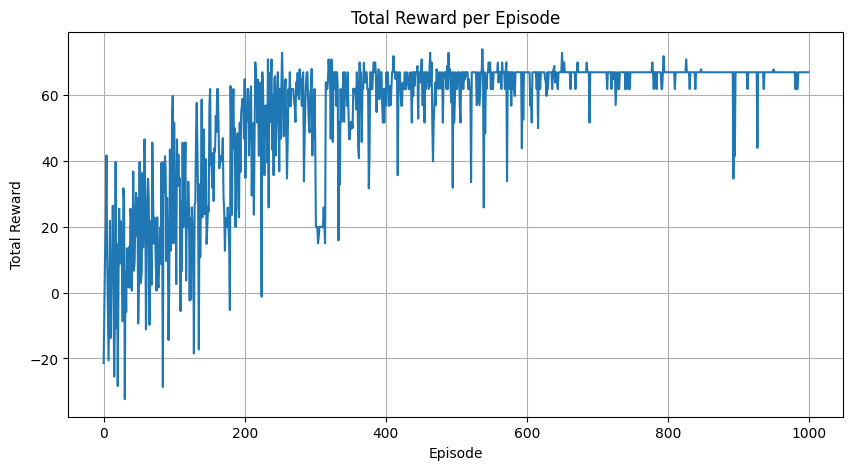

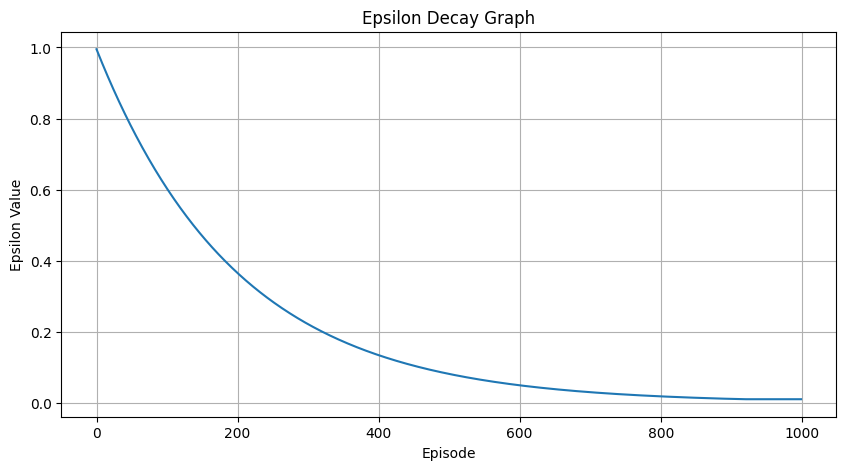

Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67


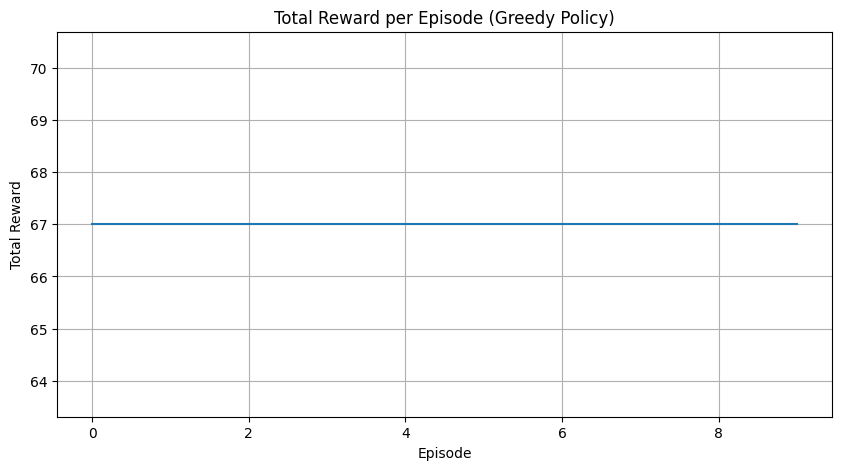

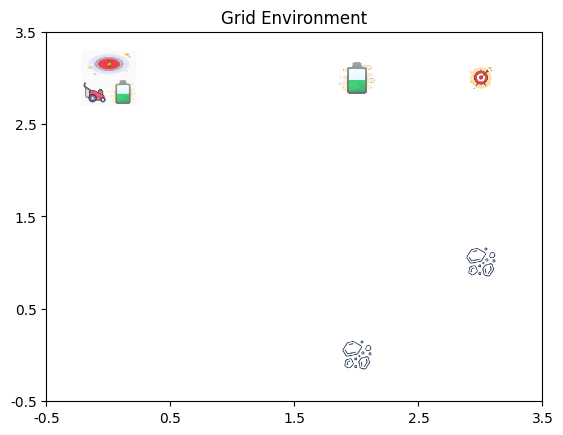

Max Timestamp, Gamma:  15, 0.9
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[39.95715267 41.27086093 44.45381431 38.80862382]
 [19.40527637 30.50531077 40.44356689 31.02302223]
 [27.70763659 27.5468559  43.98208751 29.44875107]
 [ 0.          0.          0.          0.        ]
 [10.2624322  28.42949222 13.31593898  9.07791245]
 [ 1.03356678 28.84836991  9.05829038  6.28316293]
 [ 9.73809805 11.52845483 35.48665978  2.04971031]
 [44.84326829 29.76402084 24.82629143 19.30833924]
 [ 0.          0.          0.          0.        ]
 [ 1.11485     0.16056635 12.59483091 -0.69540806]
 [ 1.35025605  6.37965653 35.83080533  0.92086826]
 [ 0.          0.          0.          0.        ]
 [-1.03721836 -0.13547865 -1.41195349 -0.92261687]
 [ 0.          0.          0. 

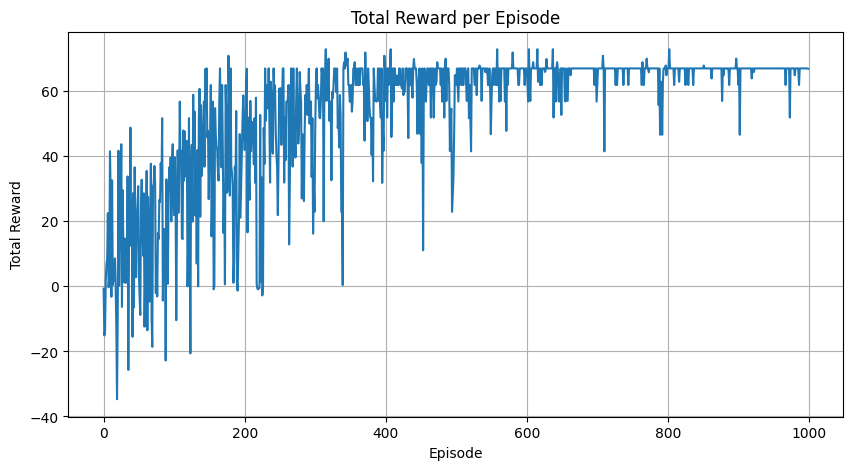

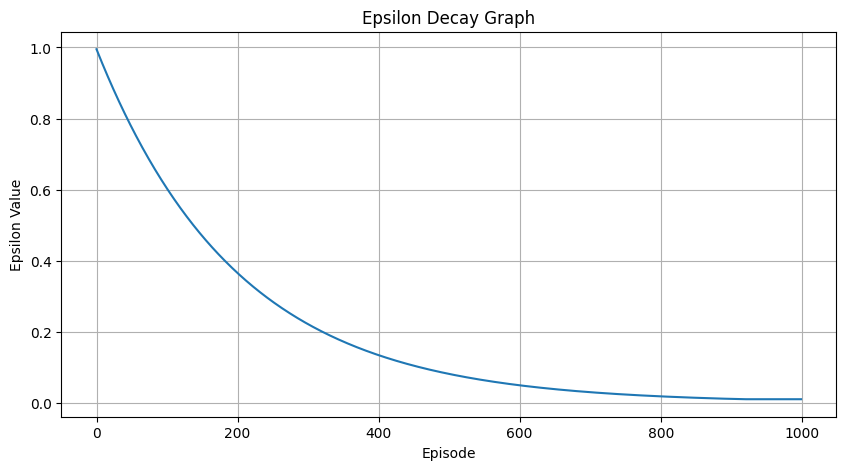

Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67
Episode 1000 Reward: 67


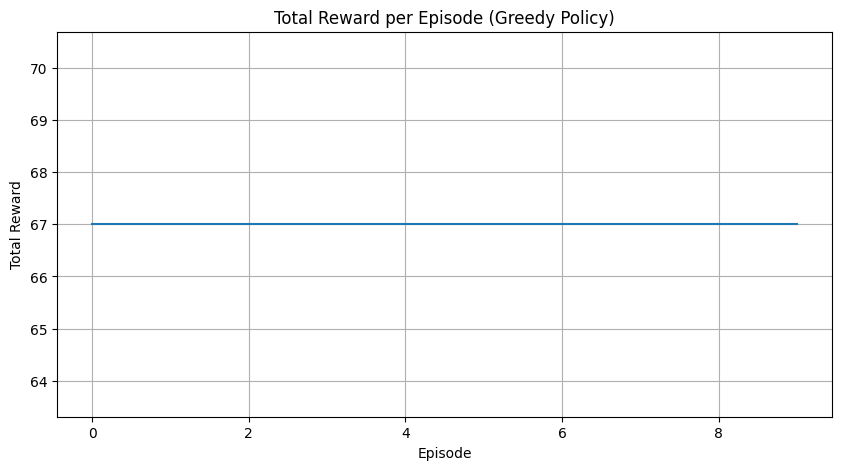

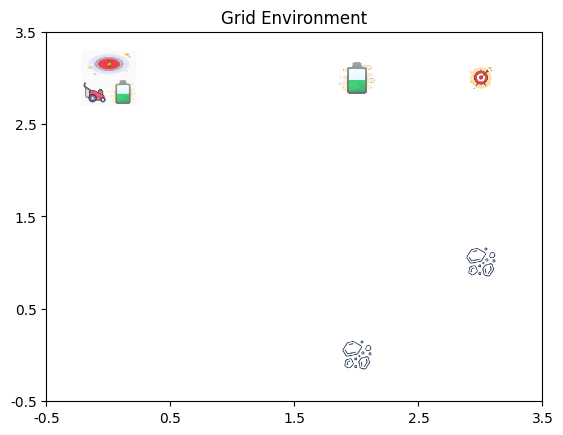

Max Timestamp, Gamma:  20, 0.1
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 0.6396296   3.97664547  5.55078612  0.46393006]
 [ 1.10818476  0.04236726  1.54893953 -0.53709752]
 [ 1.15369562  0.28471885  5.49625574 -0.86850648]
 [ 0.          0.          0.          0.        ]
 [-4.69290749 -0.59429737  1.1063109  -0.15383971]
 [ 0.95183475 -0.89310294  1.15860392 -1.05697013]
 [ 1.37754243 -0.59560669  1.63701512 -0.94006684]
 [ 6.52064955  5.48490536  0.46375194 -0.88662793]
 [ 0.          0.          0.          0.        ]
 [-5.58928188 -0.92285225  1.52190069 -4.36605764]
 [ 1.70133233 -0.8631555   6.53221304 -0.97364627]
 [ 0.          0.          0.          0.        ]
 [-0.24811117 -4.35121215 -4.15815673 -0.23455997]
 [ 0.          0.          0. 

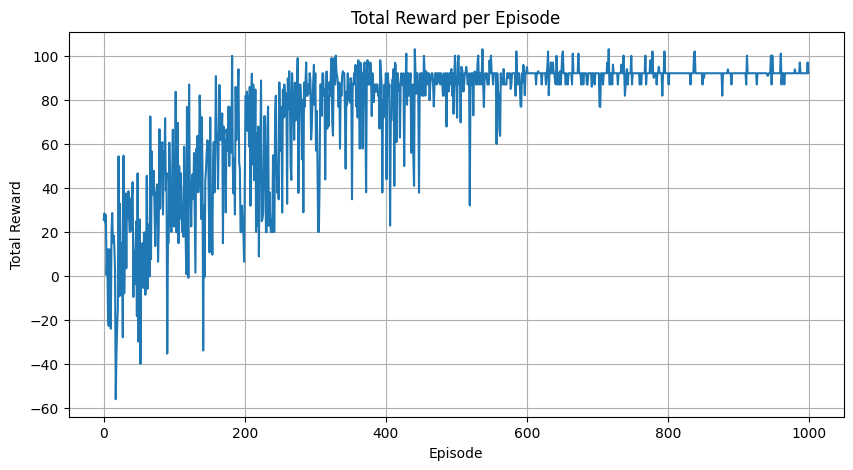

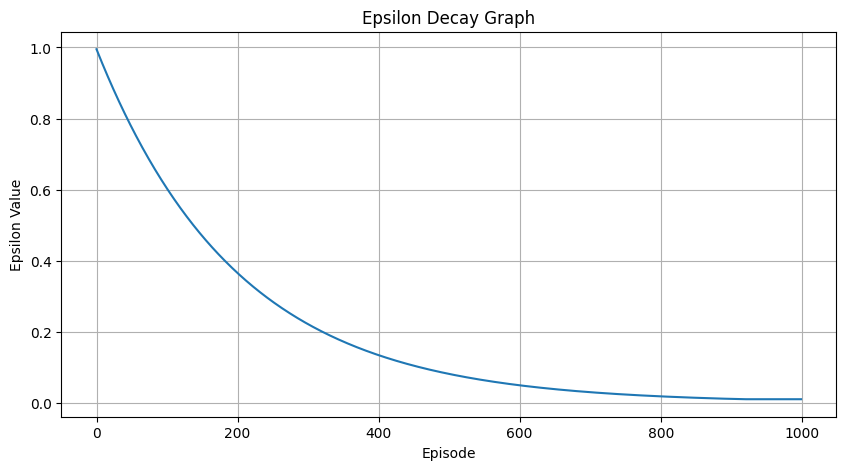

Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92


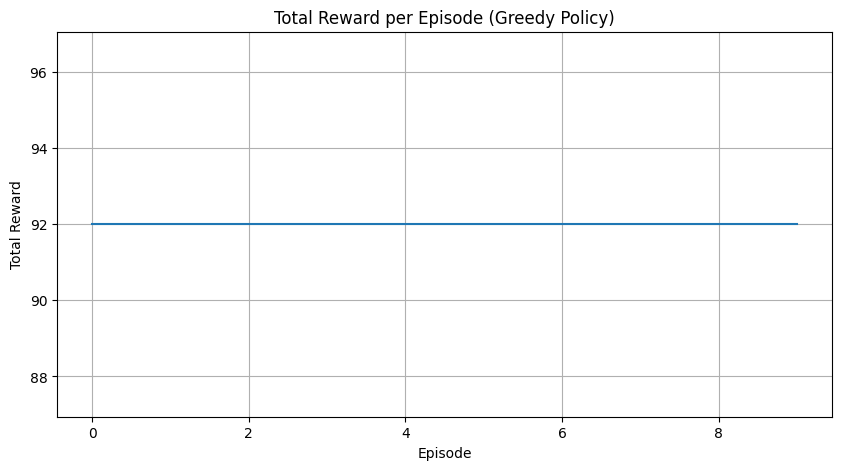

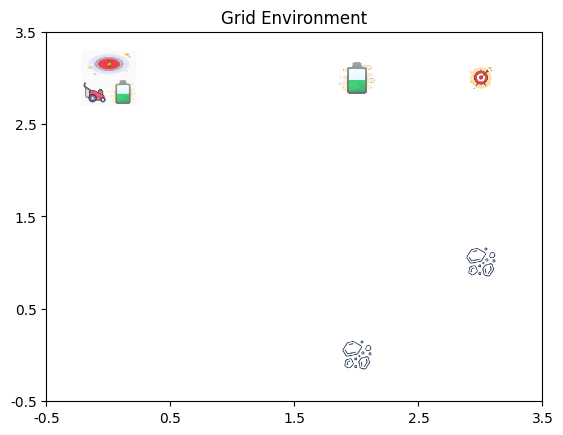

Max Timestamp, Gamma:  20, 0.5
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 4.8030952   7.48198186  9.67864823  4.37738969]
 [ 2.59379296  2.43739906  5.55230864  2.9817846 ]
 [ 3.50351528  4.12497918  9.44696107  1.11222408]
 [ 0.          0.          0.          0.        ]
 [-2.43700625  2.15066134  2.69506388 -0.01724466]
 [ 2.2431572   0.43983458  3.92492533 -0.17002617]
 [ 3.50106856  2.40809966  6.18926054  0.15830435]
 [10.63408843  8.94026861  4.58674334  1.22572239]
 [ 0.          0.          0.          0.        ]
 [-4.06557069 -0.50327173  5.57489487 -3.15083998]
 [ 3.74670625  0.7721339  10.42414932 -0.36155677]
 [ 0.          0.          0.          0.        ]
 [-0.82675286 -2.66075752 -4.07748227 -0.95917746]
 [ 0.          0.          0. 

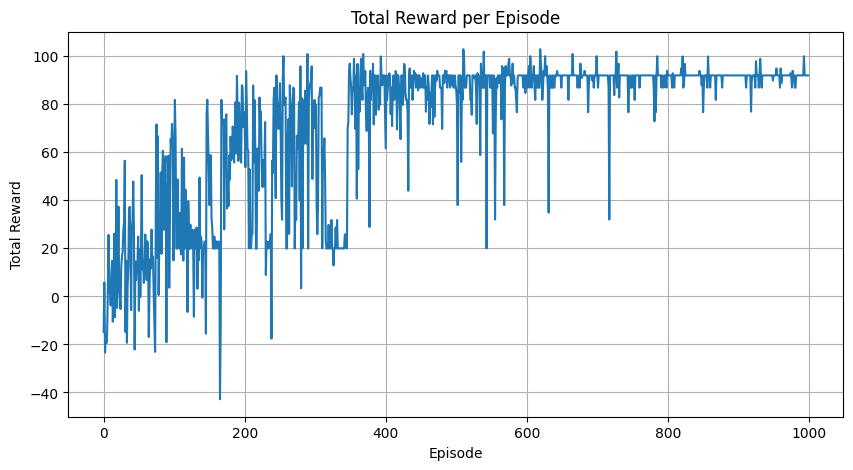

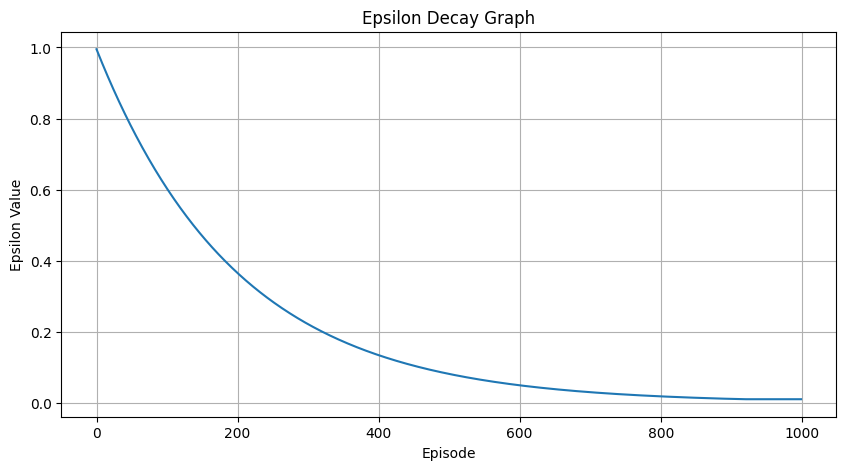

Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92


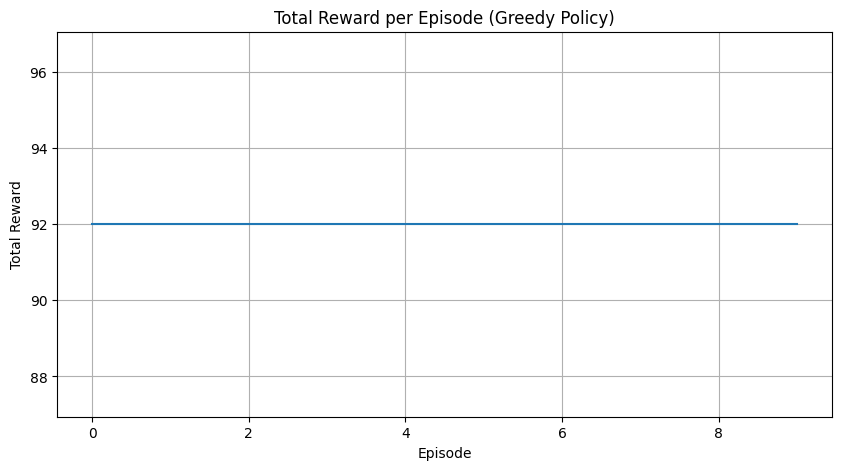

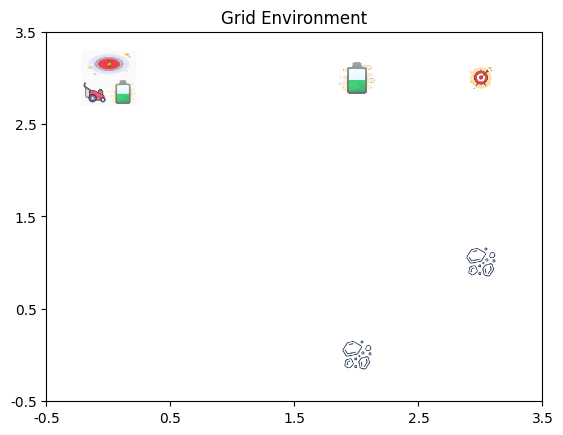

Max Timestamp, Gamma:  20, 0.9
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[39.84468513 42.21816294 46.07796084 40.31977353]
 [21.79881691 32.81083283 41.66494592 34.17162731]
 [33.36906607 36.49269585 45.31153671 29.95154963]
 [ 0.          0.          0.          0.        ]
 [10.06140252 34.60037956 12.62223404  5.87647778]
 [ 4.40437771  9.10694089 29.76622052  2.53913944]
 [17.39899865 15.60497758 40.66096404  4.10902987]
 [44.84773152 33.46160274 31.34124155 25.44889916]
 [ 0.          0.          0.          0.        ]
 [ 1.01992692  1.47965234 20.98796567  0.40739635]
 [15.00409054 10.56198683 43.10871494  5.27366039]
 [ 0.          0.          0.          0.        ]
 [-1.38292493  2.04049437 -2.22909032 -1.14525284]
 [ 0.          0.          0. 

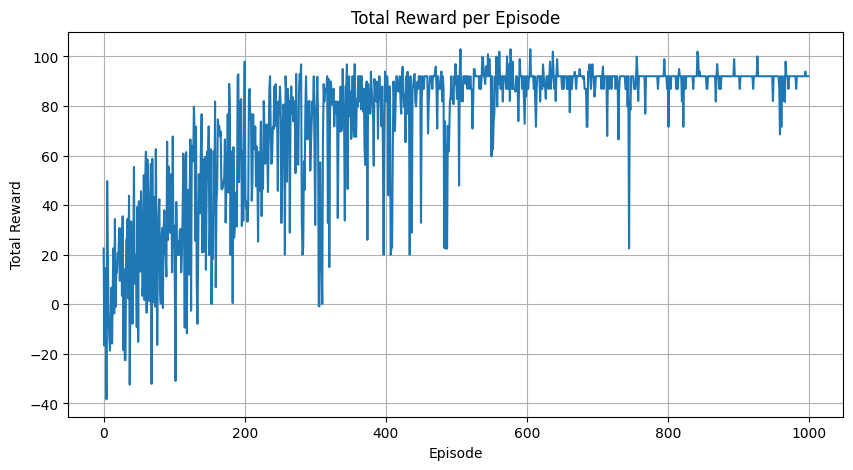

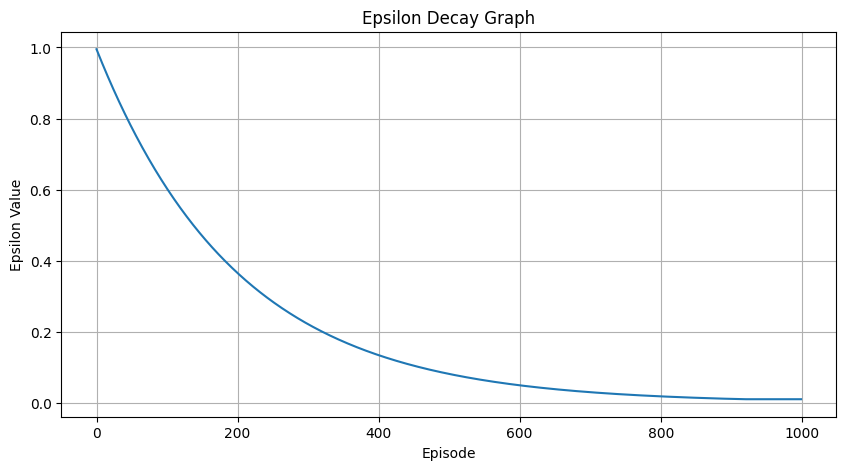

Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92
Episode 1000 Reward: 92


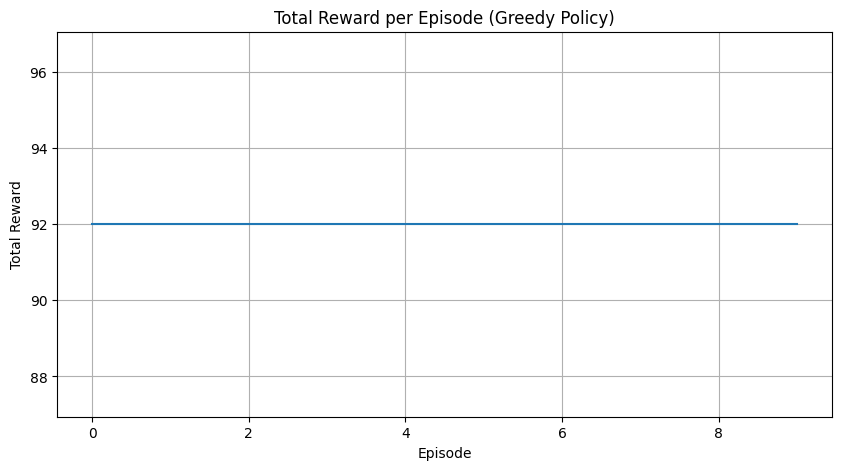

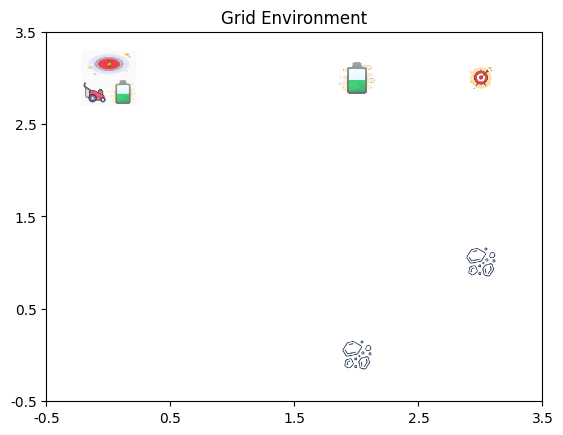

In [ ]:
max_timestamp_values = [12, 15, 20]
gamma_values = [0.1, 0.5, 0.9]

for mt in max_timestamp_values:
    for gamma in gamma_values:
        env = MyLawn(gamma=gamma, alpha=0.15, max_timestamp=mt)
        qt, rewards_epi, epsilon_values, final_state = training_loop(env, gamma, max_timestamp)
        evaluate_loop(env, mt, gamma, qt, rewards_epi, epsilon_values, final_state)

In [ ]:
_, best_gamma, best_mt = max(performance_dict, key=performance_dict.get)
print(f"Best Time Stamp: {best_mt}, Best Gamma: {best_gamma}")

Best Time Stamp: 20, Best Gamma: 0.1
